# La canción perfecta - EDA 

En este cuaderno realizaremos un EDA (Análisis Exploratorio de Datos) de los datos obtenidos de los anuncios y de las canciones que se han utilizado en ellos. Emplearemos un enfoque estadístico para analizar y resumir las características principales de nuestro conjunto de datos. Buscamos obtener una comprensión inicial de los datos antes de aplicar modelos predictivos o algoritmos más complejos.

Además bajaremos a analizar los datos por industria pudiendo así extraer los ragos diferenciadores.

## Librerías y data sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Añadimos lod csv que vamos a utilizar.
music = pd.read_csv("Canciones.csv")
adds = pd.read_csv("Anuncios.csv")

### Música

Éstas con clas caracteristicas del audio que evalúa Spotify en su plataforma.  
* Acousticness (acustica): Medida de cuán acústica es la pista.
* Danceability (bailalbilidad): Qué tan bailable es la canción, basado en una combinación de ritmo, estabilidad del beat, y otros factores.
* Energy (energía): Un valor que mide la intensidad y actividad de la pista.
* Instrumentalness (instrumentalidad): Estima si una pista no contiene letra.
* Liveness (En vivo): Probabilidad de que la pista haya sido grabada en vivo.
* Loudness (Sonoridad o Volumen): El volumen de la pista en decibelios.
* Speechiness (Cantabilidad): Evalúa la presencia de palabras habladas en una pista.
* Tempo: La velocidad de la canción medida en BPM (pulsos por minuto).
* Valence (Valencia o Positividad): Un valor que describe la positividad de la pista (felicidad o tristeza percibida).

In [3]:
music.head()

,Canciones,id_tracks,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature
0,(Everything I Do) I Do It For You,5HQ6AUDMbMuwktvcNPuV1y,398026,38,648,521,349,133,55,-13,289,131,273,1,1,4.0
1,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,315,103,532,2,1,4.0
2,2 Hearts,1OODa4x3P0DarexE3Uc2a8,173546,11,861,0,583,681,49,-6,35,112,491,9,0,4.0
3,5 Years Time,1Wl8eGdNRODM6p8LYP2ACB,215013,0,416,803,0,0,85,-7,105,121,763,0,1,4.0
4,A 1000 por Hora (En Vivo),2h8gxXvnC6MAvLnNUnNzgl,201422,39,673,513,897,0,986,-6,659,92,732,0,1,4.0


In [4]:
music.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.00000
mean,202100.808824,29.152406,451.032086,520.362299,528.029412,288.692513,370.364973,-8.355615,378.639037,121.989305,537.647059,5.052139,0.732620,3.93984
std,75667.420431,27.858906,298.923878,218.385658,289.856525,318.432555,309.847774,4.076807,200.039797,28.673855,294.334679,3.524435,0.442888,0.33191
min,30614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,161590.250000,0.000000,187.000000,428.000000,344.750000,0.000000,124.000000,-10.000000,287.000000,102.000000,322.750000,2.000000,0.000000,4.00000
50%,202393.000000,24.000000,410.000000,555.000000,554.000000,166.000000,248.500000,-7.000000,354.000000,120.500000,574.500000,5.000000,1.000000,4.00000
75%,242532.750000,52.000000,731.000000,669.500000,777.250000,504.250000,623.500000,-5.000000,475.000000,138.000000,785.250000,8.000000,1.000000,4.00000
max,715026.000000,90.000000,998.000000,921.000000,996.000000,999.000000,999.000000,-1.000000,992.000000,205.000000,998.000000,11.000000,1.000000,5.00000


## Anuncios

El empleo de música en anuncios es bastante habitual, de hecho es una forma bastante efectiva de dar a conocer temas o artistas. Por otro lado desde el punto de vista de negocio ayuda a que las marcas se identifique con estados de animo y emociones, conectando con su publico potencial.

Este dataset es futo de un trabajo de investigación y recopilación de la información que contiene.

In [25]:
adds.head()

,Canción,id_tracks,Artista/Banda,Producto,Categoría de Producto,Industria,Año
0,If You Wanna Be Happy,6VT5FAXeUNsHaz0wZbhYT3,Jimmy Soul,Pepsi,Alimentos y bebidas,Consumo y Retail,1963
1,Bring a Little Lovin',24hTWZvRrl74dwKPzqVNYf,Los Bravos,Coca-Cola,Alimentos y bebidas,Consumo y Retail,1968
2,"Hello, Dolly!",2gd28EFQmVBuAp5ihe1dAR,Louis Armstrong,Coca-Cola,Alimentos y bebidas,Consumo y Retail,1980
3,Felicità,7sXTcibuNYugjjYNfgf2kY,Al Bano and Romina Power,Nutella,Alimentos y bebidas,Consumo y Retail,1982
4,Merry Christmas Baby,4eCE7kaSrhsyTNkiZw2KKY,Charles Brown,Crown Royal,Alimentos y bebidas,Consumo y Retail,1983


In [44]:
conteo_unicos_adds = adds.nunique()
conteo_unicos_adds

Canción                  774
id_tracks                779
Artista/Banda            644
Producto                 882
Categoría de Producto     29
Industria                  7
Año                       72
dtype: int64

## La música de los anuncios

En este paso del análisis juntamos los dos datasets disponimbre a fin establecer relaciones entre los anuncios, sus productos y la música empleada para la pomoción. También haremos foco en las diferentes industrias.

In [6]:
perfecta = pd.merge(music, adds, on='id_tracks', how='inner')
perfecta.to_csv('cancion_perfecta.csv', index=False)


In [7]:
perfecta.head()

,Canciones,id_tracks,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,valence,key,mode,time_signature,Canción,Artista/Banda,Producto,Categoría de Producto,Industria,Año
0,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,532,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Top Gun,Película,Entretenimiento y Medios,1986
1,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,532,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Jarhead,Película,Entretenimiento y Medios,2005
2,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,532,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Soul Men,Película,Entretenimiento y Medios,2008
3,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,532,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,The Simpsons,Series de televisión,Entretenimiento y Medios,1989
4,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,532,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Sons of Anarchy,Series de televisión,Entretenimiento y Medios,2008


In [8]:
perfecta.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,211442.710526,34.389643,448.536503,523.314092,528.349745,271.184211,374.728353,-8.287776,395.331919,122.235144,555.446520,5.146010,0.740238,3.948217,2002.816638
std,70129.078244,30.775672,302.267799,212.933198,298.966850,296.260544,303.727997,4.055629,222.185065,28.870258,291.913645,3.467887,0.438690,0.347147,14.190667
min,30614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000
25%,171345.250000,0.000000,179.000000,429.000000,345.000000,0.000000,126.000000,-11.000000,288.000000,101.000000,337.000000,2.000000,0.000000,4.000000,1997.000000
50%,210373.000000,34.000000,404.000000,551.000000,551.000000,166.000000,274.000000,-7.000000,361.000000,121.000000,606.000000,5.000000,1.000000,4.000000,2005.000000
75%,247614.250000,64.000000,724.000000,666.750000,790.250000,430.750000,638.000000,-5.250000,501.000000,141.000000,800.500000,8.000000,1.000000,4.000000,2013.000000
max,715026.000000,90.000000,998.000000,921.000000,996.000000,999.000000,999.000000,-1.000000,992.000000,205.000000,998.000000,11.000000,1.000000,5.000000,2024.000000


In [11]:
media_industria = perfecta[['valence', 'tempo', 'instrumentalness', 'liveness', 'loudness', 'energy', 'danceability', 'acousticness', 'popularidad']].mean()

media_industria



valence             555.446520
tempo               122.235144
instrumentalness    271.184211
liveness            374.728353
loudness             -8.287776
energy              528.349745
danceability        523.314092
acousticness        448.536503
popularidad          34.389643
dtype: float64

In [12]:
perfecta['distance_to_mean'] = np.sqrt(((perfecta[['valence', 'tempo', 'instrumentalness', 'liveness', 'loudness', 'energy', 'danceability', 'acousticness', 'popularidad']] - media_industria) ** 2).sum(axis=1))

perfecta['distance_to_mean']

0       488.718909
1       488.718909
2       488.718909
3       488.718909
4       488.718909
           ...    
1173    628.041946
1174    579.276206
1175    515.463056
1176    632.302654
1177    655.616518
Name: distance_to_mean, Length: 1178, dtype: float64

#### Análisis por industria

In [28]:
valores_unicos_industria = perfecta['Industria'].unique()
valores_unicos_industria

array(['Entretenimiento y Medios', 'Consumo y Retail',
       'Salud, Bienestar y Deportes', 'Automotriz y Transporte',
       'Tecnología y Comunicaciones',
       'Finanzas y Servicios Profesionales', 'Política'], dtype=object)

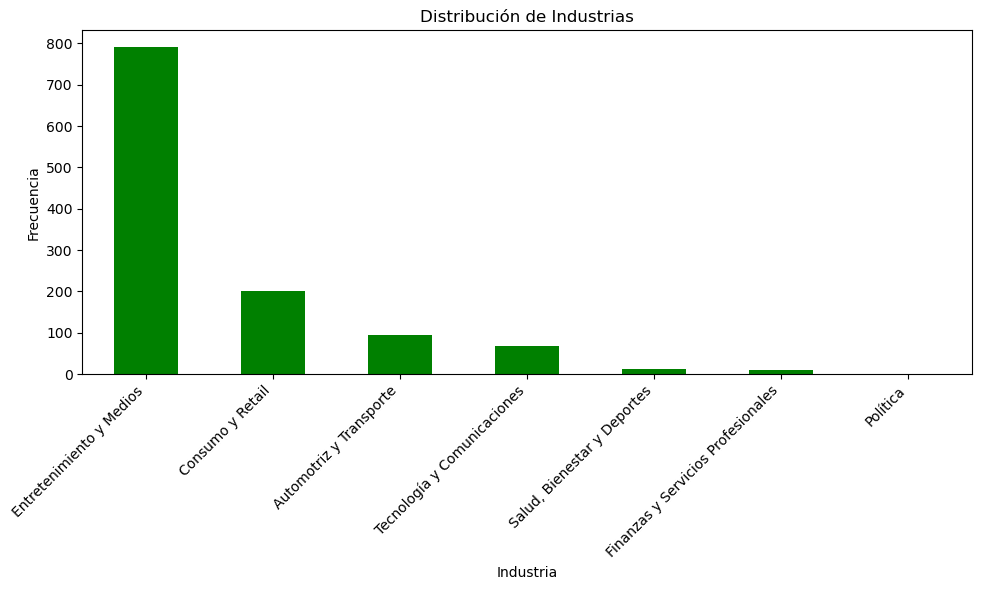

In [14]:
frecuencia_industria = perfecta['Industria'].value_counts()

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
frecuencia_industria.plot(kind='bar', color='green')

# Añadir títulos y etiquetas
plt.title('Distribución de Industrias')
plt.xlabel('Industria')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [15]:
#Creación de datasets

entretenimiento_y_medios = perfecta[perfecta['Industria'] == 'Entretenimiento y Medios']
consumo_y_retail = perfecta[perfecta['Industria'] == 'Consumo y Retail']
salud_bienestar_y_deportes = perfecta[perfecta['Industria'] == 'Salud, Bienestar y Deportes']
automotriz_y_transporte = perfecta[perfecta['Industria'] == 'Automotriz y Transporte']
tecnología_y_comunicaciones = perfecta[perfecta['Industria'] == 'Tecnología y Comunicaciones']
finanzas_y_servicios_profesionales = perfecta[perfecta['Industria'] == 'Finanzas y Servicios Profesionales']
politica = perfecta[perfecta['Industria'] == 'Política']

In [29]:
entretenimiento_y_medios.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año,distance_to_mean
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,204790.087121,36.077020,459.857323,518.075758,500.502525,279.852273,367.546717,-8.602273,394.172980,123.275253,545.366162,5.199495,0.739899,3.943182,2001.396465,682.372444
std,71603.497021,31.191515,303.657758,204.088958,299.690308,299.979560,303.836065,4.096453,221.523844,29.313597,299.024165,3.465649,0.438967,0.338142,15.679369,179.407958
min,30614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000,204.577121
25%,166546.000000,0.000000,198.250000,420.500000,297.500000,0.000000,122.750000,-11.000000,288.000000,101.000000,318.750000,2.000000,0.000000,4.000000,1994.000000,540.391455
50%,208005.500000,34.000000,418.500000,533.500000,508.500000,172.500000,245.000000,-8.000000,355.000000,121.000000,601.000000,5.000000,1.000000,4.000000,2004.000000,687.964025
75%,244920.000000,67.000000,731.000000,661.250000,757.250000,446.250000,638.000000,-6.000000,494.000000,143.000000,806.000000,8.000000,1.000000,4.000000,2013.000000,802.923605
max,715026.000000,90.000000,998.000000,906.000000,996.000000,999.000000,999.000000,-1.000000,992.000000,205.000000,998.000000,11.000000,1.000000,5.000000,2024.000000,1240.047340


In [46]:
consumo_y_retail.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año,distance_to_mean
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,221278.965000,30.935000,438.210000,528.935000,559.000000,250.105000,369.855000,-7.845000,406.01000,118.34000,583.885000,5.33500,0.725000,3.940000,2004.535000,677.478484
std,67628.004724,29.577949,303.595267,245.068775,292.948844,293.858415,284.940696,3.979972,238.89589,28.61518,287.348565,3.42365,0.447635,0.466355,10.997431,176.013527
min,64000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,1961.000000,297.580476
25%,173482.750000,0.000000,173.250000,440.000000,388.750000,0.000000,135.000000,-10.000000,281.75000,103.00000,426.000000,2.00000,0.000000,4.000000,1998.000000,562.960954
50%,211733.000000,28.000000,396.000000,592.500000,565.500000,124.000000,279.000000,-7.000000,371.00000,119.00000,650.000000,5.00000,1.000000,4.000000,2007.000000,654.786356
75%,256846.250000,60.250000,737.250000,691.000000,833.000000,416.250000,565.000000,-5.000000,547.50000,131.00000,807.500000,8.25000,1.000000,4.000000,2012.000000,805.774769
max,622000.000000,85.000000,998.000000,921.000000,974.000000,971.000000,999.000000,-1.000000,982.00000,185.00000,982.000000,11.00000,1.000000,5.000000,2024.000000,1181.031060


In [47]:
salud_bienestar_y_deportes.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año,distance_to_mean
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.00000,13.000000
mean,210000.692308,29.307692,405.000000,571.615385,524.461538,116.538462,351.384615,-7.076923,367.538462,114.076923,600.230769,4.615385,0.538462,4.0,2009.00000,591.281812
std,65347.972415,30.349038,230.311383,195.328586,279.124708,128.946123,282.326212,3.616203,166.057528,17.778552,297.459844,2.063107,0.518875,0.0,6.78233,98.977175
min,144693.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,-17.000000,52.000000,80.000000,0.000000,0.000000,0.000000,4.0,1998.00000,435.172975
25%,165400.000000,0.000000,261.000000,501.000000,353.000000,0.000000,133.000000,-7.000000,297.000000,104.000000,473.000000,4.000000,0.000000,4.0,2003.00000,489.846867
50%,208695.000000,31.000000,385.000000,602.000000,605.000000,113.000000,283.000000,-6.000000,395.000000,115.000000,717.000000,4.000000,1.000000,4.0,2009.00000,615.449617
75%,216533.000000,58.000000,616.000000,693.000000,724.000000,205.000000,503.000000,-5.000000,502.000000,129.000000,806.000000,6.000000,1.000000,4.0,2014.00000,690.272161
max,371413.000000,73.000000,781.000000,727.000000,817.000000,398.000000,919.000000,-2.000000,634.000000,141.000000,873.000000,7.000000,1.000000,4.0,2020.00000,718.999701


In [48]:
automotriz_y_transporte.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año,distance_to_mean
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,227190.617021,30.510638,410.595745,525.106383,627.765957,292.648936,444.244681,-7.691489,404.351064,122.755319,566.936170,4.702128,0.755319,3.978723,2004.925532,697.165846
std,61019.312798,28.846179,303.881992,223.481180,267.356370,312.082589,327.337407,4.029532,198.510242,28.697790,285.053129,3.618441,0.432203,0.206284,8.704515,164.076549
min,121306.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.000000,0.000000,65.000000,0.000000,0.000000,0.000000,3.000000,1980.000000,354.456312
25%,188809.500000,0.000000,137.250000,441.750000,479.500000,0.000000,153.250000,-9.000000,315.250000,101.000000,354.000000,2.000000,1.000000,4.000000,1999.000000,595.054560
50%,221893.000000,27.500000,346.000000,580.000000,693.000000,182.500000,325.500000,-7.000000,384.000000,124.000000,619.500000,4.000000,1.000000,4.000000,2005.000000,708.753942
75%,248739.500000,53.750000,664.500000,671.250000,861.000000,513.750000,743.000000,-5.000000,496.500000,139.500000,782.000000,8.000000,1.000000,4.000000,2012.000000,822.577719
max,515000.000000,89.000000,998.000000,868.000000,996.000000,969.000000,995.000000,-1.000000,979.000000,199.000000,968.000000,11.000000,1.000000,5.000000,2024.000000,1068.066452


In [50]:
tecnología_y_comunicaciones.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año,distance_to_mean
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,237277.132353,28.147059,405.176471,552.750000,651.573529,241.926471,384.000000,-6.911765,364.529412,124.029412,570.250000,5.117647,0.779412,3.955882,2008.397059,652.263276
std,64077.017743,30.612779,284.622502,211.956654,293.072622,262.907470,320.213874,3.518545,223.034397,26.021788,234.029363,3.466382,0.417726,0.206883,7.775084,165.846172
min,121306.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,84.000000,0.000000,0.000000,0.000000,3.000000,1987.000000,247.348679
25%,200306.000000,0.000000,177.000000,476.750000,536.500000,0.000000,109.000000,-8.000000,244.000000,103.000000,424.500000,2.000000,1.000000,4.000000,2003.000000,526.266173
50%,216599.500000,17.000000,317.000000,581.500000,757.500000,190.000000,279.500000,-6.000000,334.500000,125.000000,585.000000,5.000000,1.000000,4.000000,2009.000000,644.838579
75%,245846.000000,57.250000,684.500000,686.500000,848.250000,345.250000,704.250000,-5.000000,525.750000,136.000000,745.750000,8.000000,1.000000,4.000000,2014.000000,722.919965
max,515000.000000,89.000000,976.000000,912.000000,981.000000,961.000000,991.000000,-2.000000,877.000000,201.000000,965.000000,11.000000,1.000000,4.000000,2023.000000,1157.844296


In [51]:
finanzas_y_servicios_profesionales.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año,distance_to_mean
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,211823.900000,53.200000,509.500000,571.600000,406.300000,229.800000,383.900000,-9.000000,432.1000,110.800000,547.000000,2.700000,0.900000,4.0,2014.500000,595.525692
std,48176.820255,27.575351,329.084336,128.202271,247.514332,213.635619,335.034807,3.771236,231.3201,26.444071,228.487296,3.802046,0.316228,0.0,4.904646,171.446956
min,142280.000000,5.000000,26.000000,348.000000,0.000000,0.000000,0.000000,-16.000000,155.0000,85.000000,0.000000,0.000000,0.000000,4.0,2008.000000,374.837956
25%,178409.000000,43.750000,285.000000,493.500000,203.250000,31.500000,161.250000,-12.000000,303.5000,89.000000,480.250000,0.000000,1.000000,4.0,2011.250000,435.520756
50%,211933.000000,65.500000,472.500000,636.000000,426.500000,205.000000,246.000000,-7.500000,390.5000,101.000000,578.500000,1.000000,1.000000,4.0,2013.000000,613.964891
75%,233543.250000,71.750000,824.500000,669.000000,564.000000,336.500000,667.500000,-7.000000,419.0000,129.250000,658.000000,4.250000,1.000000,4.0,2018.750000,748.195842
max,293146.000000,85.000000,912.000000,693.000000,731.000000,553.000000,986.000000,-4.000000,978.0000,164.000000,855.000000,11.000000,1.000000,4.0,2022.000000,792.063739


In [52]:
politica.describe()

,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Año,distance_to_mean
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
mean,290960.0,56.0,19.0,267.0,0.0,18.0,84.0,-6.0,418.0,127.0,267.0,0.0,1.0,5.0,2009.0,872.739098
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,290960.0,56.0,19.0,267.0,0.0,18.0,84.0,-6.0,418.0,127.0,267.0,0.0,1.0,5.0,2009.0,872.739098
25%,290960.0,56.0,19.0,267.0,0.0,18.0,84.0,-6.0,418.0,127.0,267.0,0.0,1.0,5.0,2009.0,872.739098
50%,290960.0,56.0,19.0,267.0,0.0,18.0,84.0,-6.0,418.0,127.0,267.0,0.0,1.0,5.0,2009.0,872.739098
75%,290960.0,56.0,19.0,267.0,0.0,18.0,84.0,-6.0,418.0,127.0,267.0,0.0,1.0,5.0,2009.0,872.739098
max,290960.0,56.0,19.0,267.0,0.0,18.0,84.0,-6.0,418.0,127.0,267.0,0.0,1.0,5.0,2009.0,872.739098


In [53]:
parametros = ['valence', 'tempo', 'instrumentalness', 'liveness', 'loudness', 'energy', 'danceability', 'acousticness', 'popularidad']

media_por_industria = perfecta.groupby('Industria')[parametros].mean()

perfecta['distance_to_mean'] = perfecta.apply(
    lambda row: np.sqrt(
        np.sum((row[parametros] - media_por_industria.loc[row['Industria']]) ** 2)
    ), axis=1
)

cancion_mas_cercana_por_industria = perfecta.loc[perfecta.groupby('Industria')['distance_to_mean'].idxmin()]

cancion_mas_cercana_por_industria[['Canción', 'Artista/Banda','Industria', 'Categoría de Producto']]



,Canción,Artista/Banda,Industria,Categoría de Producto
854,Slipping Away,Moby,Automotriz y Transporte,Vehículos y automóviles
42,All You Need Is Love - Remastered 2009,The Beatles,Consumo y Retail,Moda y belleza
763,Por un Beso,Gloria Estefan,Entretenimiento y Medios,Series de televisión
1057,Via con me,Paolo Conte,Finanzas y Servicios Profesionales,Bancos y servicios financieros
483,If You Tolerate This Your Children Will Be Next,Manic Street Preachers,Política,Política
29,Ain't That A Kick In The Head - 1997 - Remastered,Dean Martin,"Salud, Bienestar y Deportes",Recreación y productos deportivos
535,Kiss You All Over,Exile,Tecnología y Comunicaciones,Dispositivos electrónicos


### Análisis de popularidad de las canciones

In [19]:
variance_popularidad = perfecta['popularidad'].var()
std_dev_popularidad = perfecta['popularidad'].std()
range_popularidad = perfecta['popularidad'].max() - perfecta['popularidad'].min()
iqr_popularidad = perfecta['popularidad'].quantile(0.75) - perfecta['popularidad'].quantile(0.25)

print(f"La varianza es: {variance_popularidad:.2f}")
print(f"La desviación estándar es: {std_dev_popularidad:.2f}")
print(f"El rango del precio de los productos es: {range_popularidad:.2f}")
print(f"El rango intercuartil (IQR) del precio de los productos es: {iqr_popularidad:.2f}")

# Comparar los resultados
print("Medidas de dispersión del precio de los productos:")
print(f"Varianza: {variance_popularidad:.2f}")
print(f"Desviación estándar: {std_dev_popularidad:.2f}")
print(f"Rango: {range_popularidad:.2f}")
print(f"Rango intercuartil (IQR): {iqr_popularidad:.2f}")

La varianza es: 947.14
La desviación estándar es: 30.78
El rango del precio de los productos es: 90.00
El rango intercuartil (IQR) del precio de los productos es: 64.00
Medidas de dispersión del precio de los productos:
Varianza: 947.14
Desviación estándar: 30.78
Rango: 90.00
Rango intercuartil (IQR): 64.00


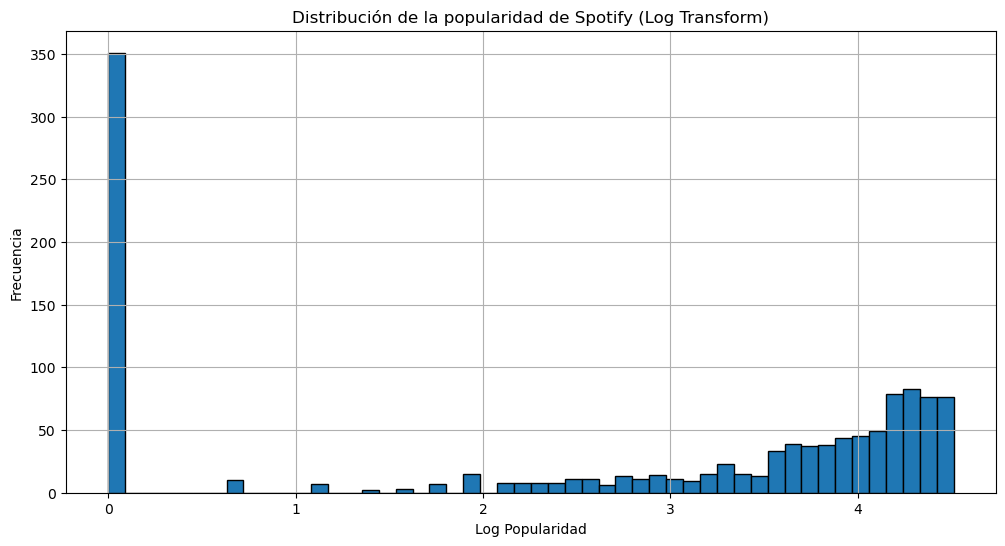

In [20]:
plt.figure(figsize=(12, 6))
plt.hist(np.log(perfecta['popularidad'] + 1), bins=50, edgecolor='k')
plt.title('Distribución de la popularidad de Spotify (Log Transform)')
plt.xlabel('Log Popularidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [55]:
# Calcular el IQR
Q1 = perfecta['popularidad'].quantile(0.25)
Q3 = perfecta['popularidad'].quantile(0.75)
IQR = Q3 - Q1

# Remover outliers
df_no_outliers = perfecta[~((perfecta['popularidad'] < (Q1 - 1.5 * IQR)) | (perfecta['popularidad'] > (Q3 + 1.5 * IQR)))]
df_no_outliers

,Canciones,id_tracks,duracion_ms,popularidad,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,key,mode,time_signature,Canción,Artista/Banda,Producto,Categoría de Producto,Industria,Año,distance_to_mean
0,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Top Gun,Película,Entretenimiento y Medios,1986,474.407332
1,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Jarhead,Película,Entretenimiento y Medios,2005,474.407332
2,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Soul Men,Película,Entretenimiento y Medios,2008,474.407332
3,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,The Simpsons,Series de televisión,Entretenimiento y Medios,1989,474.407332
4,(Sittin' On) the Dock of the Bay,3zBhihYUHBmGd2bcQIobrF,163755,82,683,768,367,179,81,-11,...,2,1,4.0,(Sittin' On) the Dock of the Bay,Otis Redding,Sons of Anarchy,Series de televisión,Entretenimiento y Medios,2008,474.407332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,You Sexy Thing,714hERk9U1W8FMYkoC83CO,244920,73,523,791,733,16,167,-5,...,5,1,4.0,You Sexy Thing,Hot Chocolate,Tesco,Tiendas físicas y minoristas,Consumo y Retail,2013,589.088429
1174,You To Me Are Everything,6E3Yn318JAqGvNVfsknW6E,212800,0,401,606,733,0,133,-7,...,0,1,4.0,You To Me Are Everything,The Real Thing,Billy Elliot,Película,Entretenimiento y Medios,2000,599.406901
1175,You're Only Lonely,0qzEkwri1hE0rgxVqdOBAf,228000,46,263,591,514,78,797,-10,...,9,1,4.0,You're Only Lonely,J.D. Souther,The Lonely Guy,Película,Entretenimiento y Medios,1984,531.457928
1176,Your Song,38zsOOcu31XbbYj9BIPUF1,241786,80,828,552,315,552,101,-11,...,3,1,4.0,Your Song,Elton John,John Lewis,Tiendas físicas y minoristas,Consumo y Retail,2018,667.441906


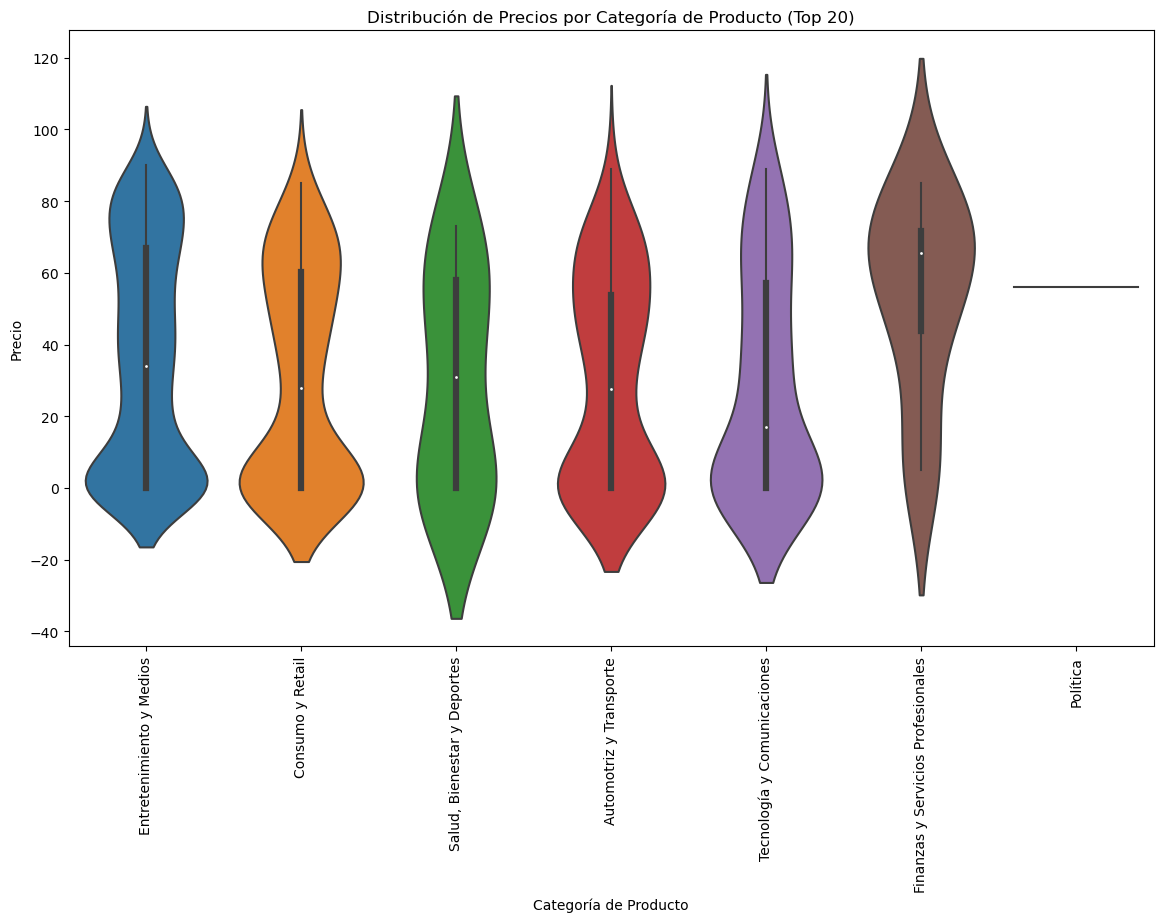

In [57]:
# Filtrar las 20 principales categorías por conteo
top_20_categories = df_no_outliers['Industria'].value_counts().index[:20]
df_top_20 = df_no_outliers[df_no_outliers['Industria'].isin(top_20_categories)]

# Violin Plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='Industria', y='popularidad')
plt.title('Popularidad por industria')
plt.xlabel('Industria')
plt.ylabel('Popularidad')
plt.xticks(rotation=90)
plt.show()

In [58]:
top_10_categories = df_no_outliers['Industria'].value_counts().index[:10]
df_top_10 = df_no_outliers[df_no_outliers['Industria'].isin(top_10_categories)]

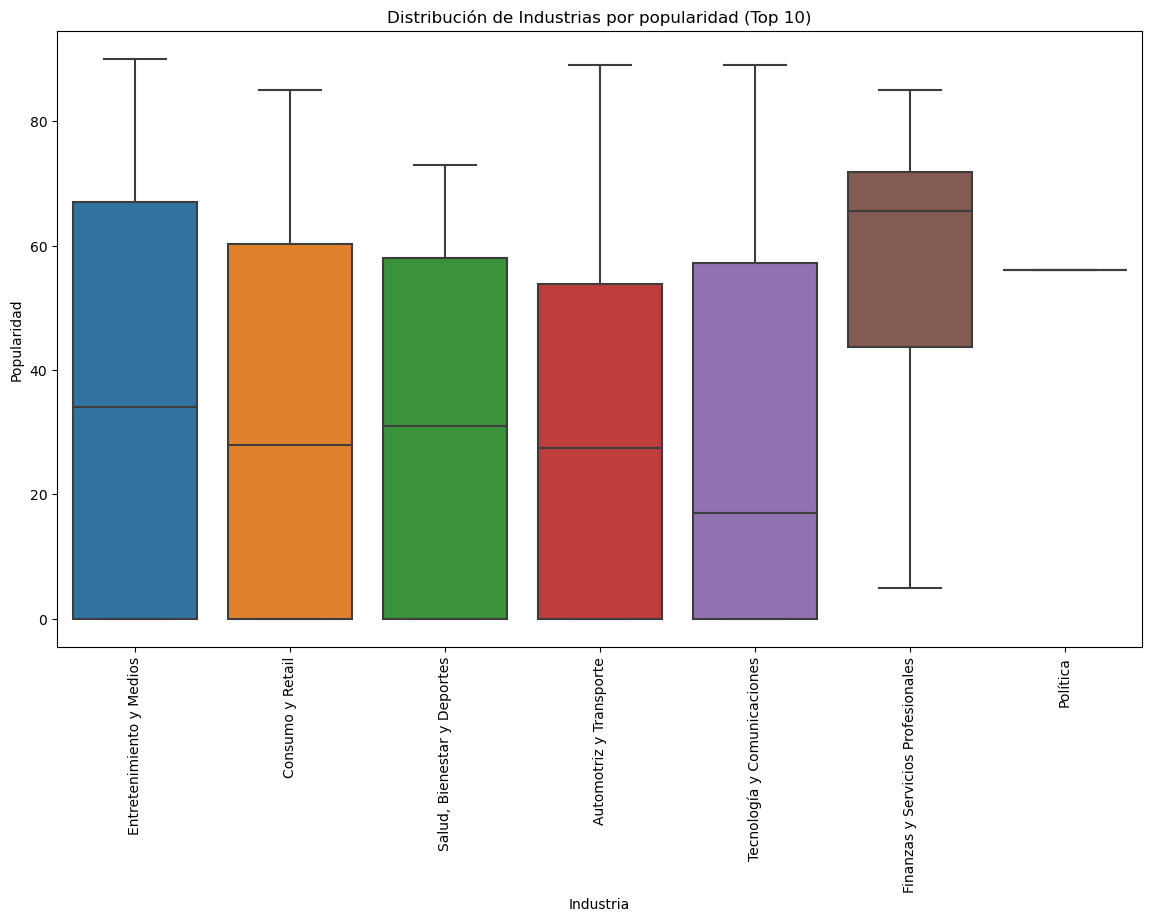

In [59]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_10, x='Industria', y='popularidad')
plt.title('Distribución de Industrias por popularidad (Top 10)')
plt.xlabel('Industria')
plt.ylabel('Popularidad')
plt.xticks(rotation=90)
plt.show()

### Correlaciones entre audio y popularidad

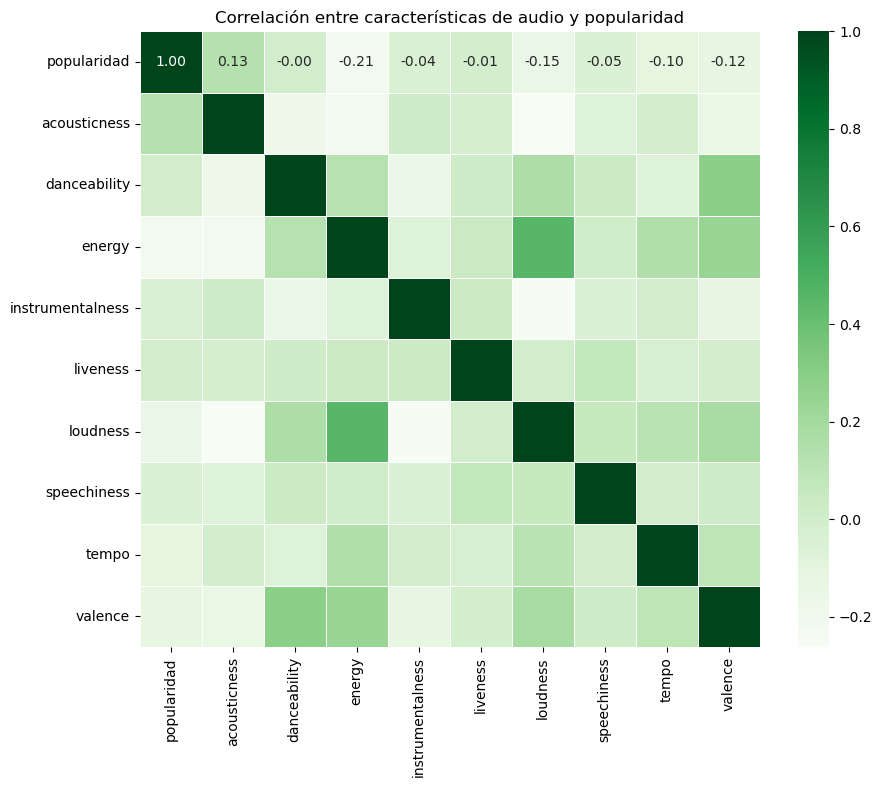

In [21]:
# General
plt.figure(figsize=(10, 8))
sns.heatmap(perfecta[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre características de audio y popularidad')
plt.show()

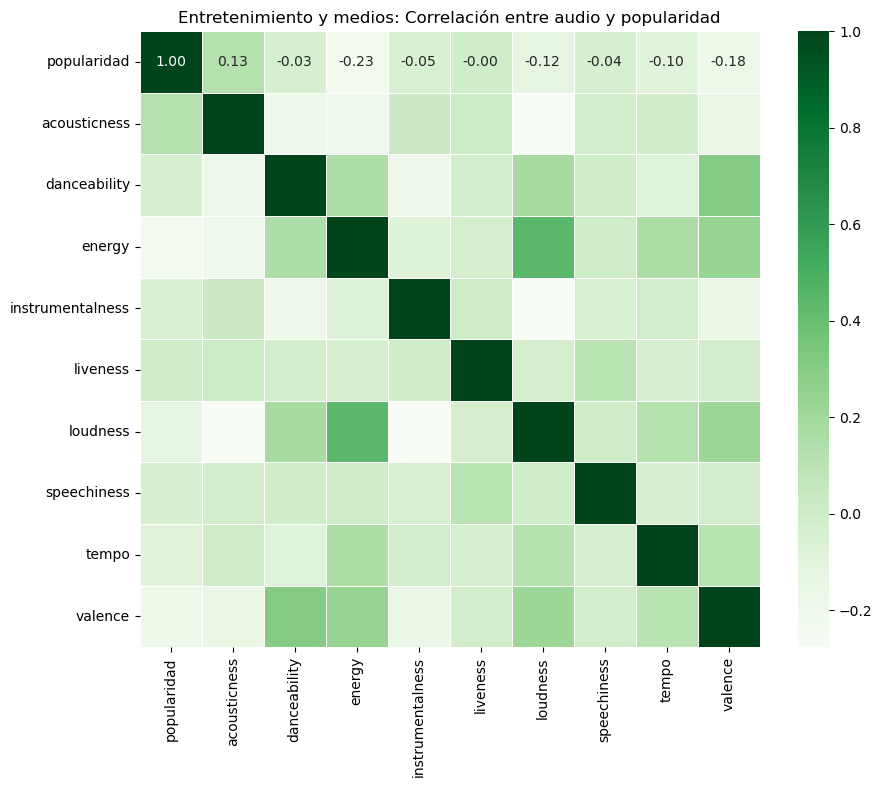

In [31]:
# Entretenimiento y medios
plt.figure(figsize=(10, 8))
sns.heatmap(entretenimiento_y_medios[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Entretenimiento y medios: Correlación entre audio y popularidad')
plt.show()

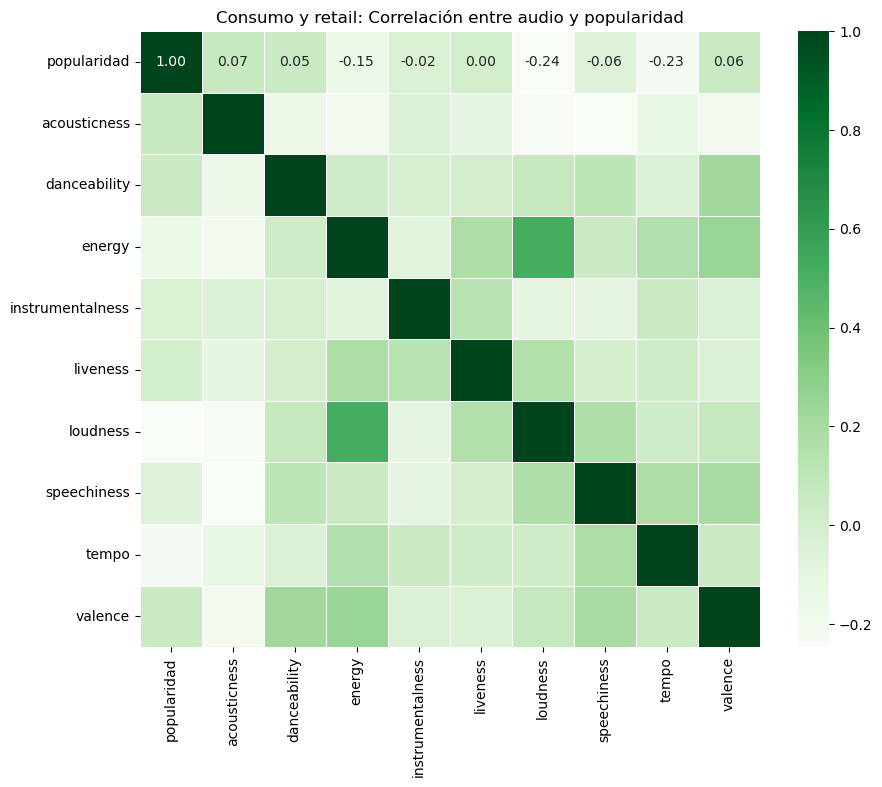

In [33]:
# Consumo y retail
plt.figure(figsize=(10, 8))
sns.heatmap(consumo_y_retail[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Consumo y retail: Correlación entre audio y popularidad')
plt.show()

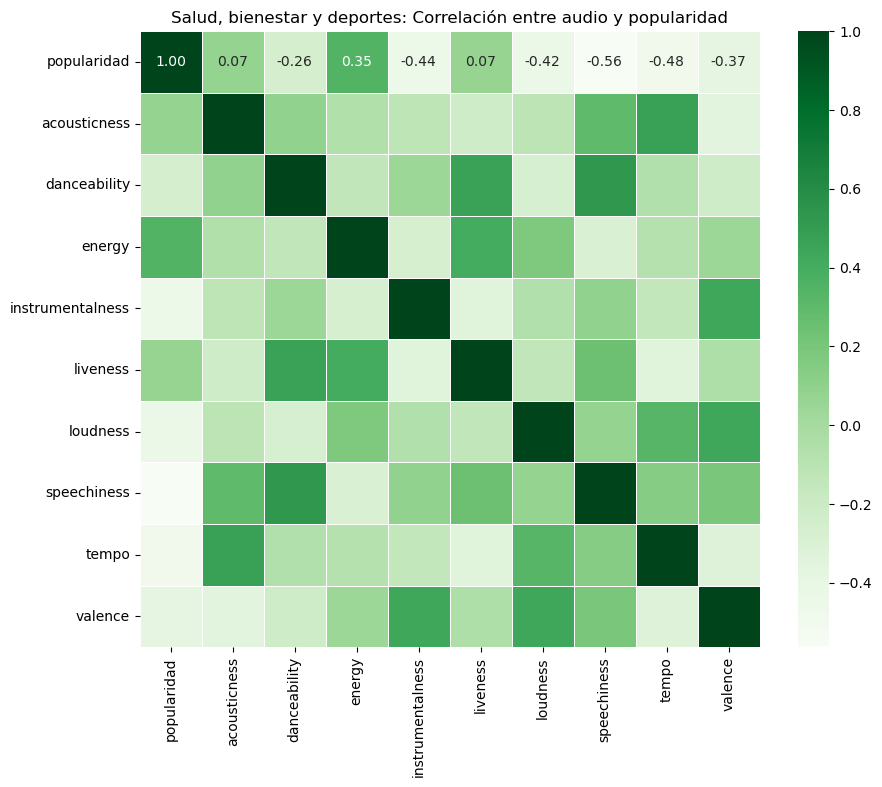

In [34]:
# Salud, bienestar y deportes
plt.figure(figsize=(10, 8))
sns.heatmap(salud_bienestar_y_deportes[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Salud, bienestar y deportes: Correlación entre audio y popularidad')
plt.show()

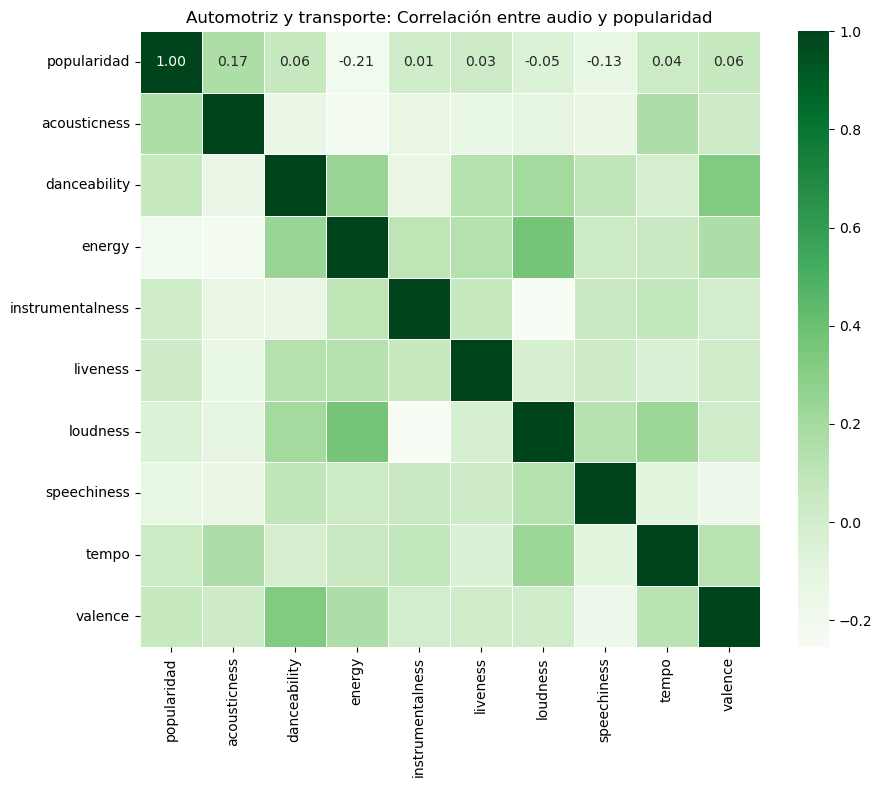

In [35]:
# Automotriz y transporte
plt.figure(figsize=(10, 8))
sns.heatmap(automotriz_y_transporte[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Automotriz y transporte: Correlación entre audio y popularidad')
plt.show()

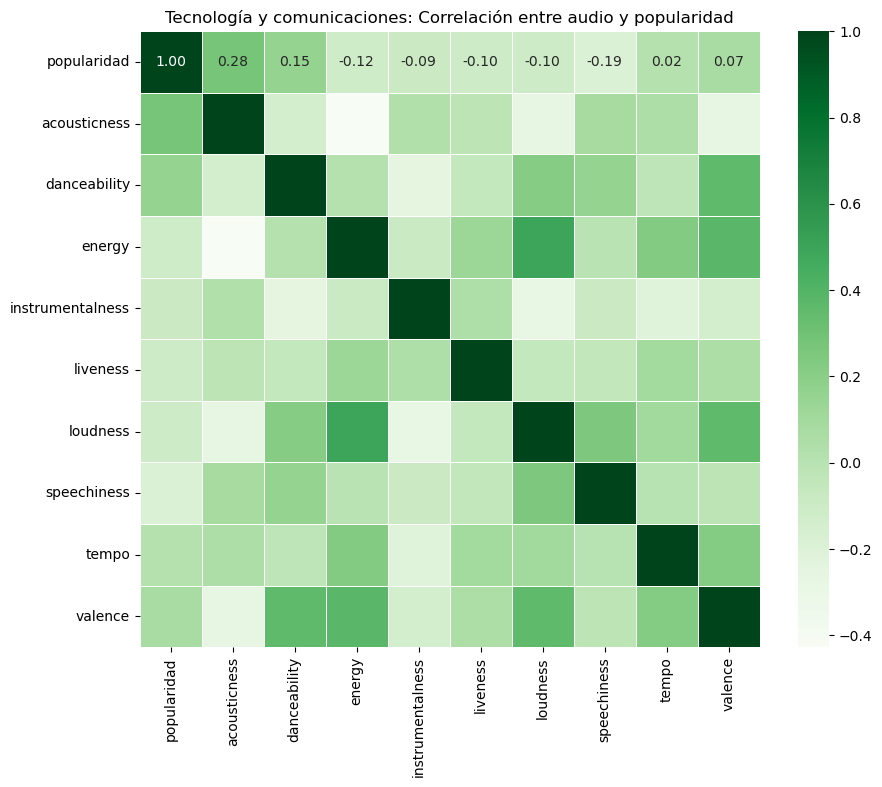

In [36]:
# Tecnología y comunicaciones
plt.figure(figsize=(10, 8))
sns.heatmap(tecnología_y_comunicaciones[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Tecnología y comunicaciones: Correlación entre audio y popularidad')
plt.show()

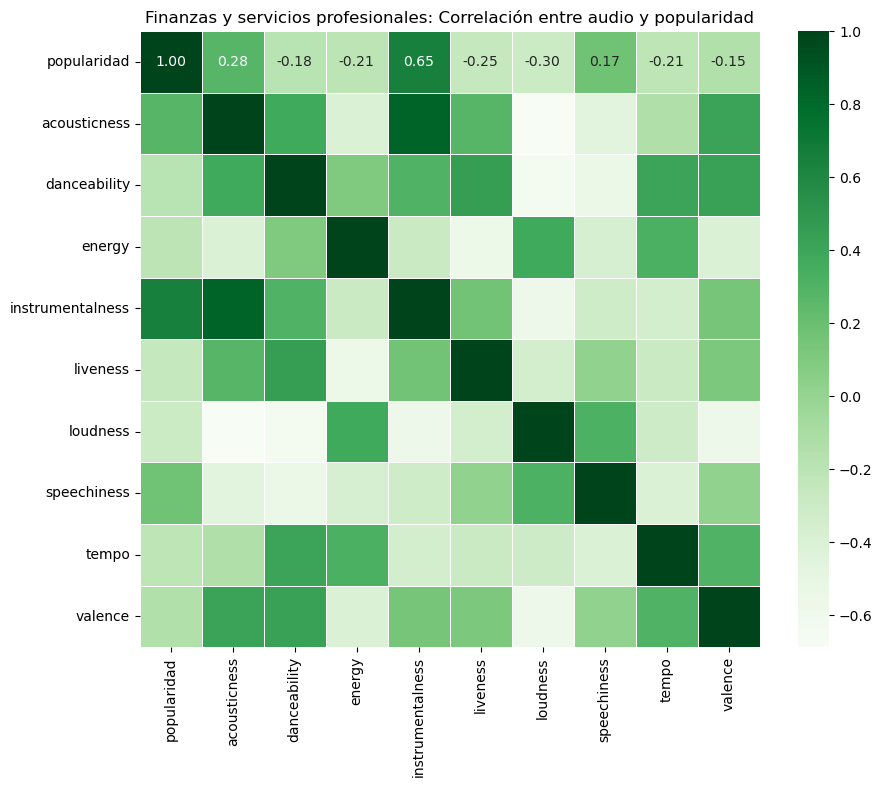

In [37]:
# Finanzas y servicios profesionales
plt.figure(figsize=(10, 8))
sns.heatmap(finanzas_y_servicios_profesionales[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Finanzas y servicios profesionales: Correlación entre audio y popularidad')
plt.show()

## La canción más paradigmática por industria